In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Data import and Understanding**

### **A. Read the ‘Signals.csv’ as DataFrame and import required libraries**

In [4]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.8.2'

In [5]:
# Initialize the random number generator
import random
seed = 32
random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
#importing data from local drive - use only once after the upload we can use the existing file itself
# from google.colab import files
# uploaded = files.upload()

# Assinging the data to Pandas data frame
# import io
# signal_df = pd.read_csv(io.BytesIO(uploaded['NN Project Data - Signal.csv']))

In [8]:
signal_df = pd.read_csv('NN Project Data - Signal.csv')

In [9]:
signal_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
def print_shape(df):
  df_shape = df.shape
  print(f'shape of dataset: {df_shape} ; number of rows: {df_shape[0]} ; number of columns: {df_shape[1]}')

In [11]:
"""
:param df - dataFrame

This method takes the dataFrame as input and print the data info  
    - dataFrame shape, no.of columns, rows
    - column names
    - categorical columns
    - non-categorical columns.

"""
def read_info(df):
    df_cols = np.asarray(df.columns)
    df_int_cols = np.asarray(df.select_dtypes('number').columns)
    df_cat_cols = np.asarray(df.select_dtypes('object').columns)
    print_shape(df)
    print('')
    print(f'cloumns: {df_cols}')
    print('')
    print('feature types::')
    print(df.dtypes)
    print('')
    print(f'non-categorical features: {df_int_cols}')
    print(f'categorical features: {df_cat_cols}')
    print('')

In [12]:
read_info(signal_df)

shape of dataset: (1599, 12) ; number of rows: 1599 ; number of columns: 12

cloumns: ['Parameter 1' 'Parameter 2' 'Parameter 3' 'Parameter 4' 'Parameter 5'
 'Parameter 6' 'Parameter 7' 'Parameter 8' 'Parameter 9' 'Parameter 10'
 'Parameter 11' 'Signal_Strength']

feature types::
Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

non-categorical features: ['Parameter 1' 'Parameter 2' 'Parameter 3' 'Parameter 4' 'Parameter 5'
 'Parameter 6' 'Parameter 7' 'Parameter 8' 'Parameter 9' 'Parameter 10'
 'Parameter 11' 'Signal_Strength']
categorical features: []



### **B. Check for missing values and print percentage for each attribute.**

In [13]:
"""
:param df - dataFrame

This method takes the dataFrame and prints the missing/null values in it
"""
def print_missing_values(df):
    # check for null values
    print('null values - info')
    print(df.isnull().sum())
    print('')
    # missing values percentage
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    print('missing values percentage::')
    print(missing_value_df)
    print('')

In [14]:
print_missing_values(signal_df)

null values - info
Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

missing values percentage::
                 percent_missing
Parameter 1                  0.0
Parameter 2                  0.0
Parameter 3                  0.0
Parameter 4                  0.0
Parameter 5                  0.0
Parameter 6                  0.0
Parameter 7                  0.0
Parameter 8                  0.0
Parameter 9                  0.0
Parameter 10                 0.0
Parameter 11                 0.0
Signal_Strength              0.0



**Observations::**

* There are no missing values in the dataset

### **C. Check for presence of duplicate records in the dataset and impute with appropriate method.**

In [15]:
"""
:param df - dataFrame

This method takes the dataFrame and handles the duplicate entries in it

It will drop the identical entries aka duplicates.

"""
def handle_duplicates(df):
    # check for duplicates in the data
    dupes = df.duplicated()
    print(f' total duplicate entries in the dataset {sum(dupes)}')
    if sum(dupes) > 0:
        df.drop_duplicates(inplace=True)
    print('duplicates handled')
    print('')
    return df

In [16]:
signal_df = handle_duplicates(signal_df)

 total duplicate entries in the dataset 240
duplicates handled



In [17]:
print_shape(signal_df)

shape of dataset: (1359, 12) ; number of rows: 1359 ; number of columns: 12


### **D. Visualise distribution of the target variable.**

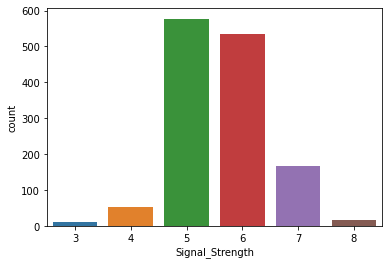

In [18]:
# Plotting the count plot for the target variable
sns.countplot(x = signal_df.Signal_Strength)

**Observation::** 

* It seems like most of the signal_strength values resides in 5, 6, 7 while 3, 8 being very less

In [19]:
"""
:param df - dataFrame

This method plots simple pair plot for the dataFrame.

"""
def visualize_data(df):
    target_column = np.asarray(df.columns)[-1]
    # pairplot
    plt.figure(figsize=(10,5))
    sns.pairplot(df);
    # pariplot distinguished by Target
    sns.pairplot(df,hue= target_column)

In [20]:
visualize_data(signal_df)

Output hidden; open in https://colab.research.google.com to view.

### **E. Share insights from the initial data analysis**

In [21]:
"""
:param df - dataFrame

This method prints the unique values in each column/entries of dataFrame.

"""
def list_unique_values(df):
    # unique values in each coulmn
    for i in np.asarray(df.columns):
        print(f'unique values in {i} : ')
        print(df[i].unique())
        print('')

In [22]:
list_unique_values(signal_df)

unique values in Parameter 1 : 
[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]

unique values in Parameter 2 : 
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0

In [23]:
signal_df.describe(include='all')

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
"""
:param df - dataFrame

This method checks for the correlation in the data.
If there are any high correlated columns (correlation > 0.85) - it handles by droppping the high correlated info

it returns the updated dataFrame

"""
def handle_high_correlated_data(df):
    cor_matrix = df.corr().abs()
    print('corr matrix')
    print(cor_matrix)
    print('')
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    print(upper_tri)
    # selecting columns with absolute correlation greater than 0.85
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
    print(); print(f'high correlated:: total columns {len(to_drop)} ', to_drop)
    df1 = df.drop(np.asarray(to_drop), axis=1)
    # df1 = df.drop(df.columns[to_drop], axis=1)
    print(); print(df1.head())
    return df1

In [25]:
handle_high_correlated_data(signal_df)

corr matrix
                 Parameter 1  Parameter 2  Parameter 3  Parameter 4  \
Parameter 1         1.000000     0.255124     0.667437     0.111025   
Parameter 2         0.255124     1.000000     0.551248     0.002449   
Parameter 3         0.667437     0.551248     1.000000     0.143892   
Parameter 4         0.111025     0.002449     0.143892     1.000000   
Parameter 5         0.085886     0.055154     0.210195     0.026656   
Parameter 6         0.140580     0.020945     0.048004     0.160527   
Parameter 7         0.103777     0.071701     0.047358     0.201038   
Parameter 8         0.670195     0.023943     0.357962     0.324522   
Parameter 9         0.686685     0.247111     0.550310     0.083143   
Parameter 10        0.190269     0.256948     0.326062     0.011837   
Parameter 11        0.061596     0.197812     0.105108     0.063281   
Signal_Strength     0.119024     0.395214     0.228057     0.013640   

                 Parameter 5  Parameter 6  Parameter 7  Paramete

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Observations**

* Signal_Strength has unique values - [ 5 6 7 4 8 3 ]
  * most of the signal_strength values resides in 5, 6, 7
  * Very less values resides in 3, 8

* there is potential difference between 75% & max values of columns/ features paramter 7 - looks like there will be outliers in the dataset.

* There are no high correlated features/columns.

* We have to standardise the data.


In [26]:
"""
:param df - dataFrame

This method accepts dataFrame and updates the data as scale independent by using `zscore`.

it returns the updated dataFrame.

"""
def normalise_data(df):
    non_cat_cols = np.asarray(df.select_dtypes(exclude = ['object']).columns)
    for i in non_cat_cols:
        df[i] = stats.zscore(df[i])
    return df

In [27]:
# not applying the normalisation from here as 2.D requested for the same
# signal_df = normalise_data(signal_df)

In [28]:
def boxplot_all(xSize, ySize, data):
    f, axes = plt.subplots(1, 1, figsize=(xSize, ySize))
    plot = sns.boxplot(x='variable',y='value', data= pd.melt(data), palette='Set1', ax=axes, orient='v')
    plot.set_xlabel('',fontsize=20)
    plot.set_xticklabels(rotation=60, labels=plot.get_xticklabels(),fontweight='demibold',fontsize='x-large')

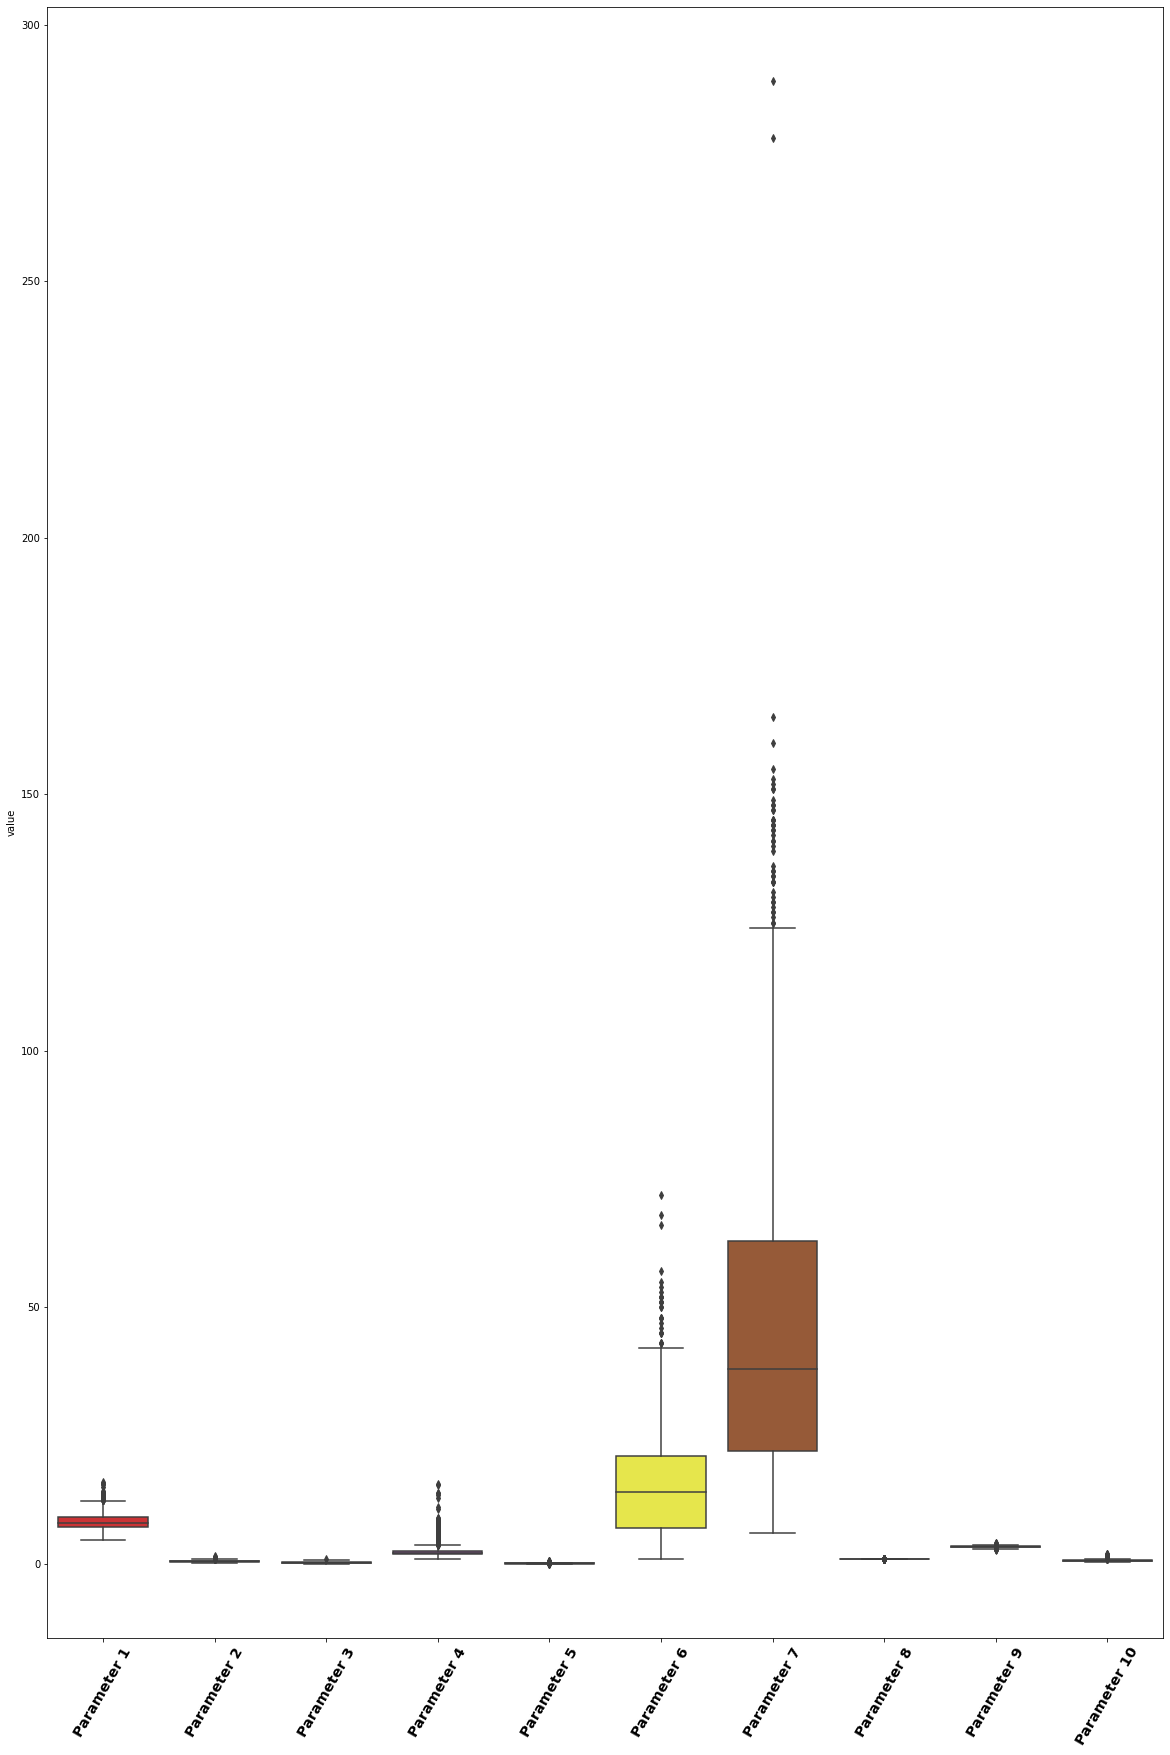

In [29]:
boxplot_all(20,30, data =signal_df.iloc[:,:10])

__Observations:__

* It seems like params have outliers ( param - 4, 7, 6 have most of the outliers)
* we will impute these outliers using median of the specific feature

In [30]:
#Replacing outilers with median
def impute_outliers(df, cols):
    for col_name in cols:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3 - q1

        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr

        df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()
    return df

In [31]:
df = impute_outliers(signal_df, signal_df.columns.drop('Signal_Strength'))

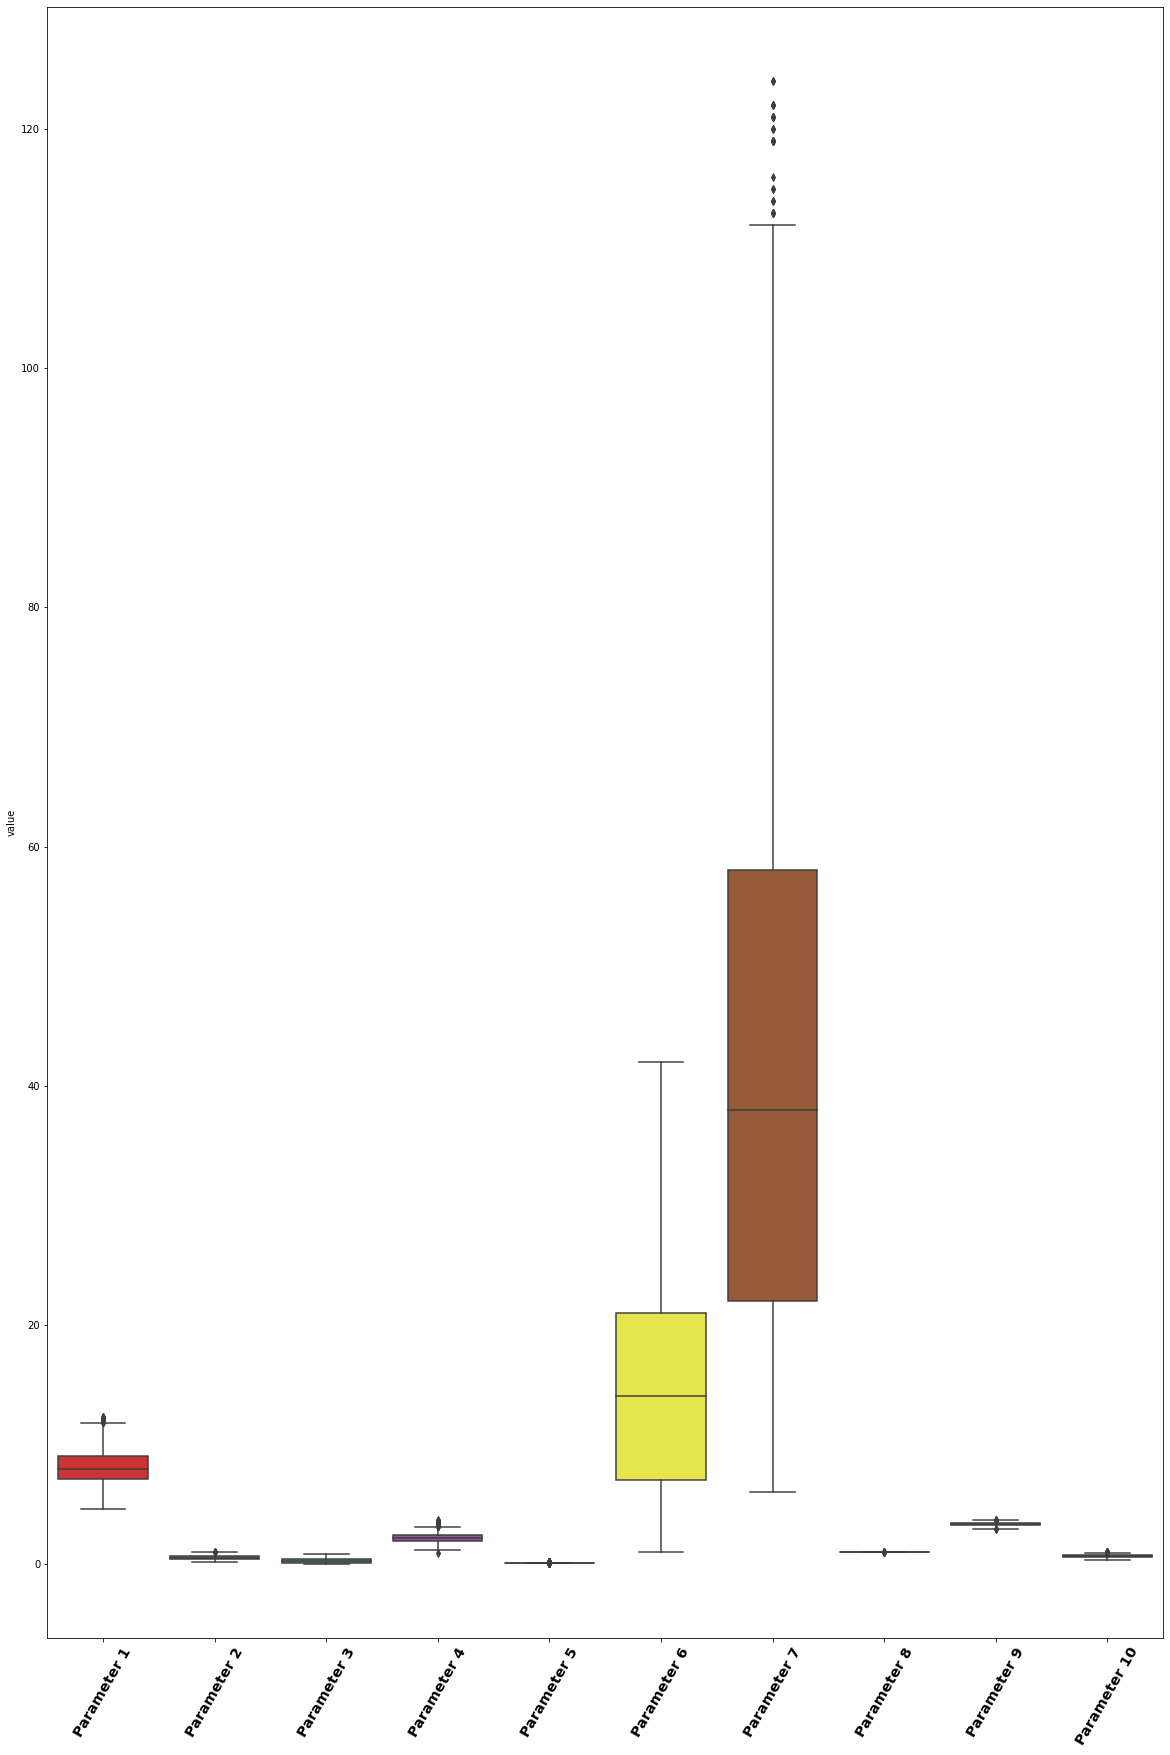

In [32]:
boxplot_all(20,30, data =df.iloc[:,:10])

## **2. Data preprocessing**

### **A.Split the data into X & Y.**

In [33]:
#Split Data
X = df.drop("Signal_Strength", axis=1)
y = df['Signal_Strength']

### **B. Split the data into train & test with 70:30 proportion**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

### **C. Print shape of all the 4 variables and verify if train and test data is in sync.**

In [35]:
print('X Train shape - ', X_train.shape)
print('X Test shape - ', X_test.shape)

print('y Train shape - ', y_train.shape)
print('y Test shape - ', y_test.shape)


X Train shape -  (951, 11)
X Test shape -  (408, 11)
y Train shape -  (951,)
y Test shape -  (408,)


In [36]:
y_train.unique()

array([6, 5, 7, 4, 8, 3])

In [37]:
y_test.unique()

array([5, 6, 7, 4, 3, 8])

**Observation**

* Both train and test data is in sync, since they have same set of Signal_Strength values

### **D.Normalise the train and test data with appropriate method.**

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train

array([[-0.90262993,  0.68237506, -1.06954118, ...,  1.1678127 ,
        -0.73688438,  0.003577  ],
       [-0.56571139, -0.53087791, -0.1925684 , ...,  2.09831466,
        -0.39387065,  0.68717796],
       [-0.56571139, -0.92518513,  1.09709745, ...,  0.38046489,
         1.23544455,  0.58952068],
       ...,
       [-0.7004788 , -0.53087791, -0.55367484, ...,  1.31096685,
         0.03489651,  0.003577  ],
       [-0.56571139,  1.04635096,  0.22012467, ...,  0.16573367,
        -1.07989811, -0.87533852],
       [ 1.65795099, -0.10623937,  0.89075091, ..., -0.55003707,
         0.72092396,  0.4918634 ]])

In [40]:
X_test

array([[ 0.71457907,  0.25773652, -0.50208821, ..., -1.12265366,
        -1.25140497, -0.4847094 ],
       [-1.03739734,  0.37906182, -1.32747435, ...,  0.52361904,
         0.20640337,  2.15203716],
       [ 0.37766053,  1.59231479,  1.20027072, ..., -2.19630977,
        -0.13661036, -1.16831036],
       ...,
       [-1.71123443,  2.01695334, -1.17271445, ...,  1.81200637,
         1.57845828,  2.445009  ],
       [ 0.04074199, -0.77352851,  0.52964447, ..., -0.33530585,
         0.89243083, -0.58236668],
       [ 1.38841616, -1.68346824,  1.09709745, ..., -1.19423074,
        -0.22236379,  0.003577  ]])

### **E. Transform Labels into format acceptable by Neural Network**

In [41]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (951, 9)
One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0. 0.]


## **3. Model Training & Evaluation using Neural Network**

### **A. Design a Neural Network to train a classifier.**

In [42]:
model = Sequential()
model.add(Dense(11, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(9, activation='softmax'))

### **B. Train the classifier using previously designed Architecture**

In [43]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
result = None
# Fit the model
result =model.fit(x=X_train, y=y_train, batch_size=20, epochs=100, validation_data=(X_test, y_test),verbose=2)

Epoch 1/100
48/48 - 1s - loss: 2.0555 - accuracy: 0.3028 - val_loss: 1.9553 - val_accuracy: 0.3946 - 910ms/epoch - 19ms/step
Epoch 2/100
48/48 - 0s - loss: 1.8119 - accuracy: 0.4154 - val_loss: 1.7090 - val_accuracy: 0.4142 - 121ms/epoch - 3ms/step
Epoch 3/100
48/48 - 0s - loss: 1.5499 - accuracy: 0.4301 - val_loss: 1.5193 - val_accuracy: 0.4265 - 146ms/epoch - 3ms/step
Epoch 4/100
48/48 - 0s - loss: 1.3877 - accuracy: 0.4501 - val_loss: 1.4435 - val_accuracy: 0.4289 - 152ms/epoch - 3ms/step
Epoch 5/100
48/48 - 0s - loss: 1.3122 - accuracy: 0.4595 - val_loss: 1.4046 - val_accuracy: 0.4387 - 115ms/epoch - 2ms/step
Epoch 6/100
48/48 - 0s - loss: 1.2672 - accuracy: 0.4774 - val_loss: 1.3862 - val_accuracy: 0.4216 - 163ms/epoch - 3ms/step
Epoch 7/100
48/48 - 0s - loss: 1.2386 - accuracy: 0.4805 - val_loss: 1.3556 - val_accuracy: 0.4387 - 119ms/epoch - 2ms/step
Epoch 8/100
48/48 - 0s - loss: 1.2140 - accuracy: 0.4974 - val_loss: 1.3400 - val_accuracy: 0.4534 - 122ms/epoch - 3ms/step
Epoch 9

In [44]:
# Model Evaluation
scores = model.evaluate(X_test, y_test, verbose=2)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

13/13 - 0s - loss: 1.1821 - accuracy: 0.5245 - 226ms/epoch - 17ms/step
Loss: 1.1820909976959229
Accuracy: 0.5245097875595093


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 20)                240       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 11)                231       
                                                                 
 dense_4 (Dense)             (None, 9)                 108       
                                                                 
Total params: 1,131
Trainable params: 1,131
Non-trainable params: 0
_________________________________________________________________


### **C. Plot 2 separate visuals.**

In [46]:
def plot_loss(res_his):
  plt.figure(figsize=(5,5))
  plt.plot(res_his['loss'])
  plt.plot(res_his['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

In [47]:
def plot_acc(res_his):
  plt.figure(figsize=(5,5))
  plt.plot(res_his['accuracy'])
  plt.plot(res_his['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

#### **i. Training Loss and Validation Loss**


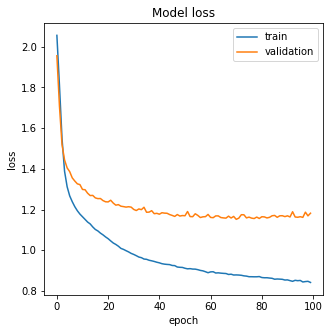

In [48]:
# Visulaize the training loss & validation loss metrics 
plot_loss(result.history)

#### **ii. Training Accuracy and Validation Accuracy**

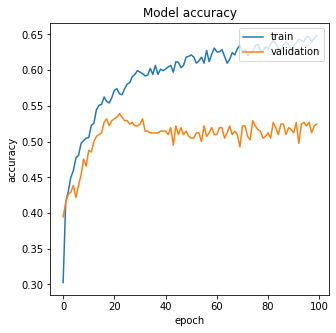

In [49]:
# Visulaize the training loss & validation loss metrics 
plot_acc(result.history)

**Observations::**

*  It is noticed that after certain threshold point validation accuracy begins to decrease in the first plot.
* It is noticed that after certain threshold point  validation loass saturated where as train loss gradually kept decreasing.

### **D. Design new architecture/update existing architecture in attempt to improve the performance of the model.** 

In [50]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 20
    output_nodes = 9

    model = Sequential()
    model.add(Dense(11, input_shape=(11,), activation='relu', kernel_initializer= "he_normal"))
    model.add(Dense(hidden_nodes, activation='relu', kernel_initializer= "he_normal"))
    model.add(Dense(hidden_nodes, activation='relu', kernel_initializer= "he_normal"))
    model.add(Dense(11, activation='relu', kernel_initializer= "he_normal"))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 2, validation_data=(X_test, y_test))
    score = model.evaluate(X_train, y_train, verbose=2)
    
    return score

In [51]:
def train_and_model(iterations, lr, Lambda):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 20
    output_nodes = 9

    model = Sequential()
    model.add(Dense(11, input_shape=(11,), activation='relu', kernel_initializer= "he_normal"))
    model.add(Dense(hidden_nodes, activation='relu', kernel_initializer= "he_normal"))
    model.add(Dense(hidden_nodes, activation='relu', kernel_initializer= "he_normal"))
    model.add(Dense(11, activation='relu', kernel_initializer= "he_normal"))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    result = model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 2,validation_data=(X_test, y_test))
    score = model.evaluate(X_train, y_train, verbose=2)
    
    return model,result

In [52]:
import math
results = []
for k in range(1,20):
    lr = math.pow(10, np.random.uniform(-4.0, 2.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop(20, lr, Lambda, False)
    results.append("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}".format(k, 100, best_acc, lr, Lambda))

Epoch 1/20
10/10 - 2s - loss: 2.0042 - accuracy: 0.3523 - val_loss: 2.5330 - val_accuracy: 0.2966 - 2s/epoch - 228ms/step
Epoch 2/20
10/10 - 0s - loss: 2.0389 - accuracy: 0.4763 - val_loss: 1.9308 - val_accuracy: 0.4436 - 99ms/epoch - 10ms/step
Epoch 3/20
10/10 - 0s - loss: 1.7138 - accuracy: 0.4196 - val_loss: 1.5881 - val_accuracy: 0.4363 - 83ms/epoch - 8ms/step
Epoch 4/20
10/10 - 0s - loss: 1.3682 - accuracy: 0.4501 - val_loss: 1.4060 - val_accuracy: 0.4240 - 122ms/epoch - 12ms/step
Epoch 5/20
10/10 - 0s - loss: 1.2089 - accuracy: 0.4311 - val_loss: 1.2908 - val_accuracy: 0.3971 - 125ms/epoch - 13ms/step
Epoch 6/20
10/10 - 0s - loss: 1.2049 - accuracy: 0.4269 - val_loss: 1.3115 - val_accuracy: 0.4093 - 115ms/epoch - 11ms/step
Epoch 7/20
10/10 - 0s - loss: 1.2099 - accuracy: 0.3870 - val_loss: 1.3057 - val_accuracy: 0.4093 - 121ms/epoch - 12ms/step
Epoch 8/20
10/10 - 0s - loss: 1.1879 - accuracy: 0.3891 - val_loss: 1.3046 - val_accuracy: 0.4265 - 122ms/epoch - 12ms/step
Epoch 9/20
10

In [53]:
results

['Try 1/100: Best_val_acc: [1.1811610460281372, 0.43112513422966003], lr: 0.553122146802884, Lambda: 0.00670836263774428',
 'Try 2/100: Best_val_acc: [0.9334123134613037, 0.6109358668327332], lr: 0.014282616927007262, Lambda: 0.0005061259788183556',
 'Try 3/100: Best_val_acc: [nan, 0.0], lr: 8.528280296472321, Lambda: 0.004840392642651789',
 'Try 4/100: Best_val_acc: [1.2988462448120117, 0.5730809569358826], lr: 0.0003839933768522027, Lambda: 0.003734325937001508',
 'Try 5/100: Best_val_acc: [13.244115829467773, 0.12933753430843353], lr: 11.71196718123293, Lambda: 0.00042884204262557096',
 'Try 6/100: Best_val_acc: [0.8579036593437195, 0.6466876864433289], lr: 0.03371472192608431, Lambda: 0.0002613847962806069',
 'Try 7/100: Best_val_acc: [8.451896272749467e+20, 0.12933753430843353], lr: 34.05345237975853, Lambda: 1.7391094877966506e-05',
 'Try 8/100: Best_val_acc: [1.741995930671692, 0.43533122539520264], lr: 0.00041254110838773416, Lambda: 0.000329066502280285',
 'Try 9/100: Best_val

In [54]:
# designing and training the model with best hyper parameters
lr=0.1602679632746333
Lambda=0.0003534015870309672
model, result = train_and_model(20, lr, Lambda)

Epoch 1/20
10/10 - 1s - loss: 1.6061 - accuracy: 0.4132 - val_loss: 1.2575 - val_accuracy: 0.4804 - 1s/epoch - 119ms/step
Epoch 2/20
10/10 - 0s - loss: 1.1015 - accuracy: 0.5668 - val_loss: 1.2661 - val_accuracy: 0.4975 - 116ms/epoch - 12ms/step
Epoch 3/20
10/10 - 0s - loss: 1.0442 - accuracy: 0.5499 - val_loss: 1.1733 - val_accuracy: 0.5245 - 91ms/epoch - 9ms/step
Epoch 4/20
10/10 - 0s - loss: 0.9855 - accuracy: 0.5941 - val_loss: 1.1411 - val_accuracy: 0.5686 - 75ms/epoch - 7ms/step
Epoch 5/20
10/10 - 0s - loss: 0.9905 - accuracy: 0.5720 - val_loss: 1.1411 - val_accuracy: 0.5343 - 78ms/epoch - 8ms/step
Epoch 6/20
10/10 - 0s - loss: 0.9734 - accuracy: 0.6130 - val_loss: 1.1158 - val_accuracy: 0.5711 - 127ms/epoch - 13ms/step
Epoch 7/20
10/10 - 0s - loss: 0.9684 - accuracy: 0.5994 - val_loss: 1.1290 - val_accuracy: 0.5221 - 67ms/epoch - 7ms/step
Epoch 8/20
10/10 - 0s - loss: 0.9427 - accuracy: 0.6225 - val_loss: 1.1454 - val_accuracy: 0.5441 - 75ms/epoch - 7ms/step
Epoch 9/20
10/10 - 0

### **E. Plot visuals as in Q3.C and share insights about difference observed in both the models**

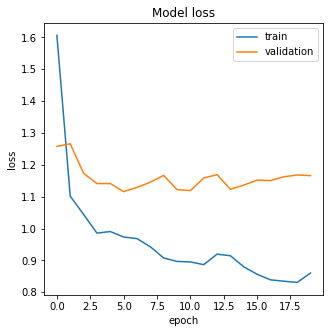

In [55]:
plot_loss(result.history)

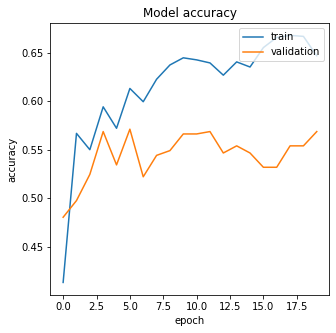

In [56]:
plot_acc(result.history)

In [57]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 11)                132       
                                                                 
 dense_101 (Dense)           (None, 20)                240       
                                                                 
 dense_102 (Dense)           (None, 20)                420       
                                                                 
 dense_103 (Dense)           (None, 11)                231       
                                                                 
 dense_104 (Dense)           (None, 9)                 108       
                                                                 
Total params: 1,131
Trainable params: 1,131
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Model Evaluation
scores = model.evaluate(X_test, y_test, verbose=2)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

13/13 - 0s - loss: 1.1660 - accuracy: 0.5686 - 55ms/epoch - 4ms/step
Loss: 1.1659518480300903
Accuracy: 0.5686274766921997


**__Observations__::**

*  In the base model - It is noticed that after certain threshold point validation accuracy begins to decrease.
* In the base model - It is noticed that after certain threshold point  validation loass saturated where as train loss gradually kept decreasing.

*  In the updated model - It is noticed that validation accuracy begins to increase.
* In the updated model - It is noticed that after certain threshold point  validation loass saturated where as train loss gradually kept decreasing.

* Base Model:
  * Loss: 1.1820909976959229
  * Accuracy: 0.5245097875595093

* Updated Model:
  * Loss: 1.1659518480300903
  * Accuracy: 0.5686274766921997